# Power Consumption Analysis System

## Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

## Reading the Dataset

In [2]:
dataset = pd.read_csv(
    'household_power_consumption.txt', 
    sep = ';', 
    parse_dates = {'datetime' : ['Date', 'Time']},
    infer_datetime_format = True, 
    na_values = ['nan','?'],
    index_col = 'datetime'
)

In [3]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Data Visualization Before handling Null Values

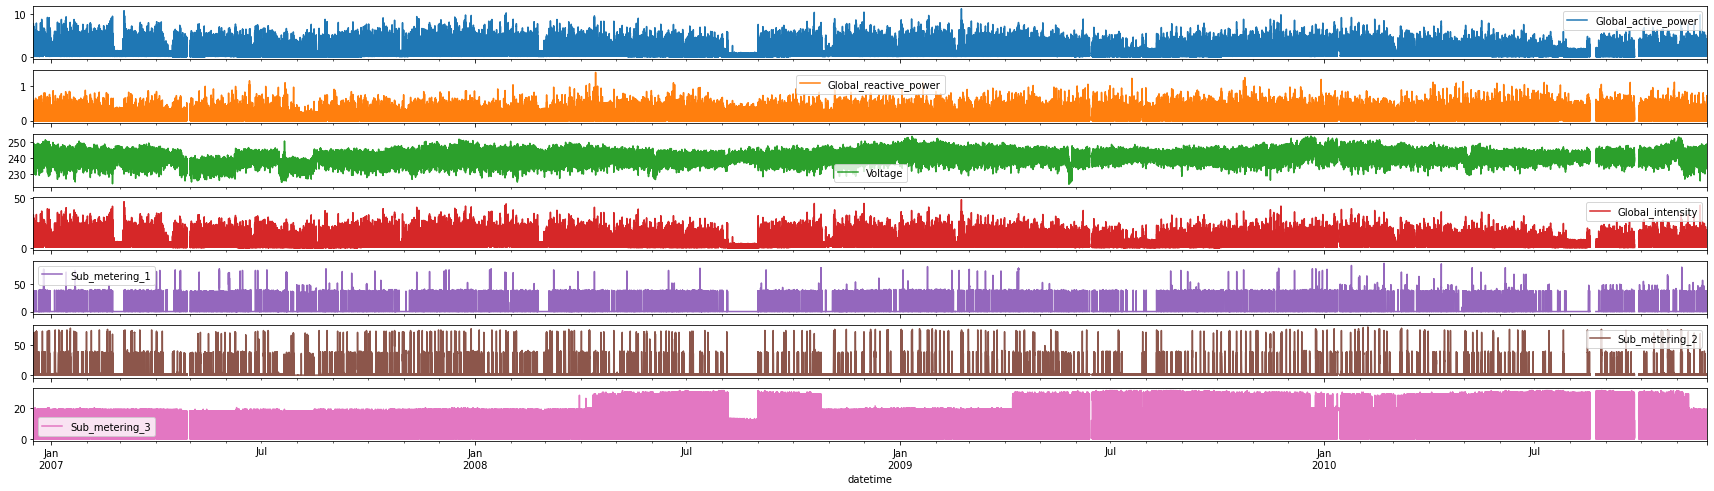

In [6]:
# Visualization of data
dataset.plot(subplots=True, figsize=(30,8))
plt.show()

## Handling Null Values

In [7]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
#Handling Missing Values
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset.shape

(2075259, 7)

In [10]:
#Filling all the null values with the mean of their columns
dataset['Global_active_power'].fillna(dataset['Global_active_power'].mean(),inplace=True)
dataset['Global_reactive_power'].fillna(dataset['Global_reactive_power'].mean(),inplace=True)
dataset['Voltage'].fillna(dataset['Voltage'].mean(),inplace=True)
dataset['Global_intensity'].fillna(dataset['Global_intensity'].mean(),inplace=True)
dataset['Sub_metering_1'].fillna(dataset['Sub_metering_1'].mean(),inplace=True)
dataset['Sub_metering_2'].fillna(dataset['Sub_metering_2'].mean(),inplace=True)
dataset['Sub_metering_3'].fillna(dataset['Sub_metering_3'].mean(),inplace=True)

In [11]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
dataset.shape

(2075259, 7)

In [13]:
#Adding another sub_metering_4 column to calculate the remiaing Global Intensity
values = dataset.values
dataset['Sub_metering_4'] = (values[:,0] * 1000/60) - (values[:,4] + values[:,5] + values[:,6])

In [14]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

## Correlation of dataset values

In [15]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [16]:
#Descriptive Statistical
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


## Dataset Visualization

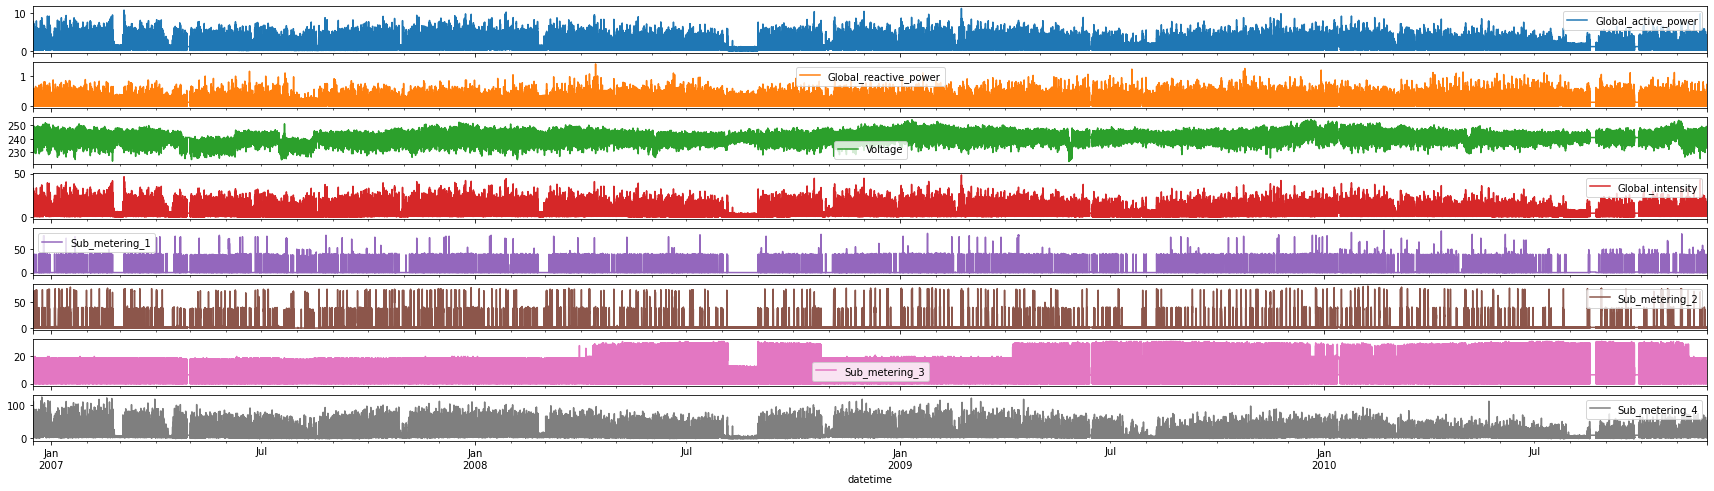

In [17]:
# Visualization data after handling the null values
dataset.plot(subplots=True, figsize=(30,8))
plt.show()

## Univariate Analysis

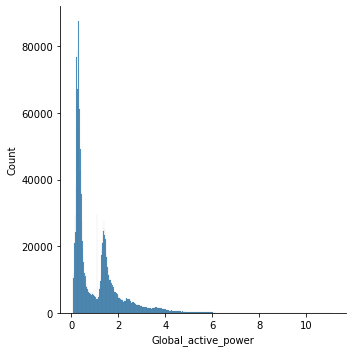

In [18]:
sns.displot(dataset['Global_active_power'])

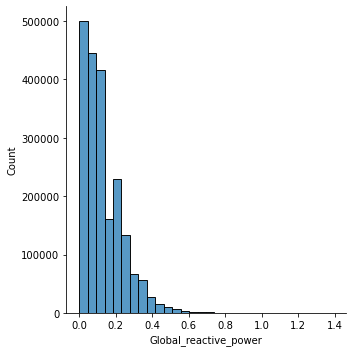

In [19]:
sns.displot(dataset['Global_reactive_power'],kde=False,bins=30)

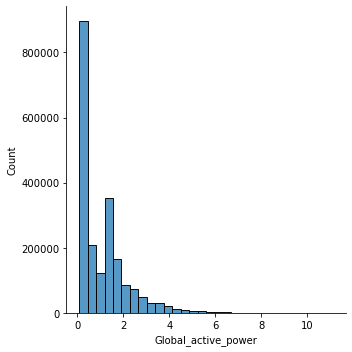

In [20]:
sns.displot(dataset['Global_active_power'],kde=False,bins=30)

## Bivariate Analysis

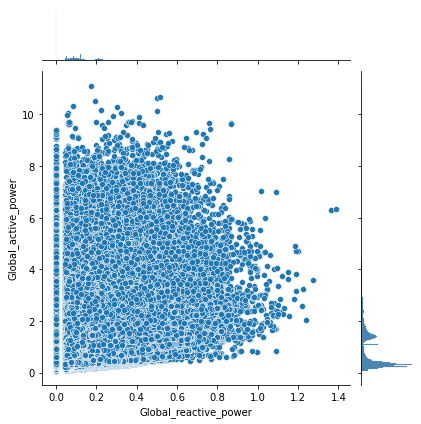

In [21]:
sns.jointplot(x = 'Global_reactive_power', y = 'Global_active_power', data = dataset, kind = 'scatter')

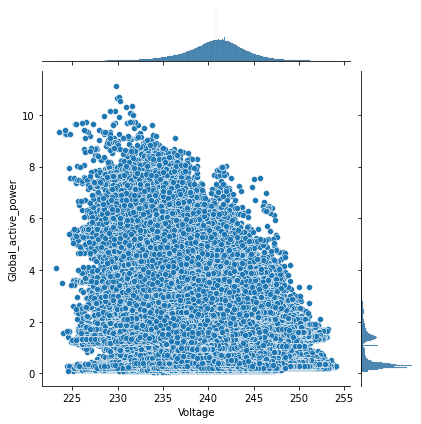

In [22]:
sns.jointplot(x = 'Voltage', y = 'Global_active_power', data = dataset, kind = 'scatter')

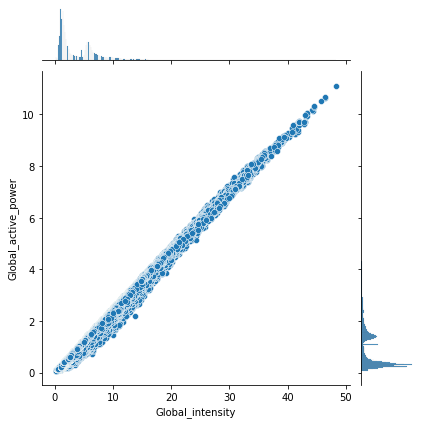

In [23]:
sns.jointplot(x = 'Global_intensity', y = 'Global_active_power', data = dataset, kind = 'scatter')

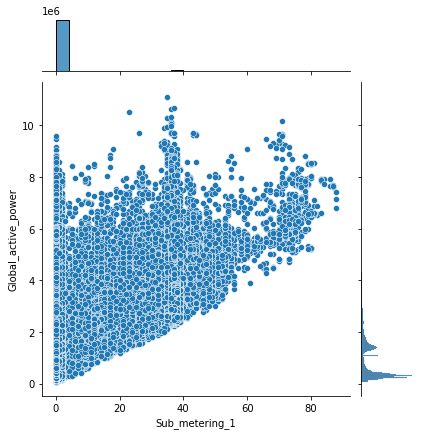

In [24]:
sns.jointplot(x = 'Sub_metering_1', y = 'Global_active_power', data = dataset, kind = 'scatter')

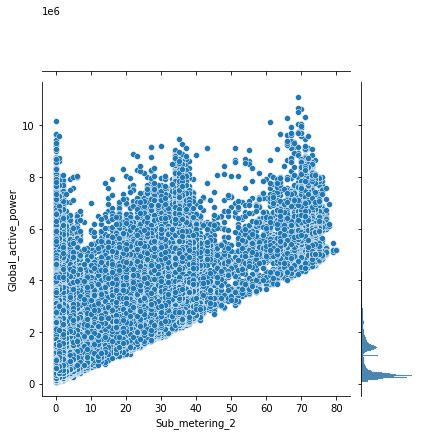

In [25]:
sns.jointplot(x = 'Sub_metering_2', y = 'Global_active_power', data = dataset, kind = 'scatter')

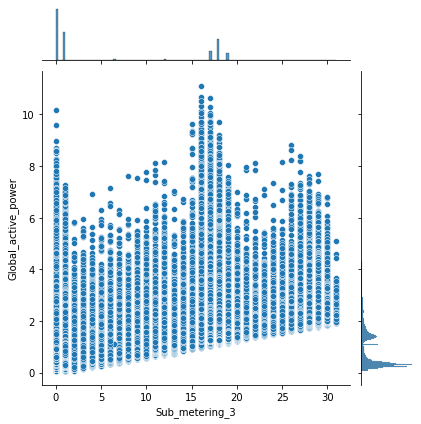

In [26]:
sns.jointplot(x = 'Sub_metering_3', y = 'Global_active_power', data = dataset, kind = 'scatter')

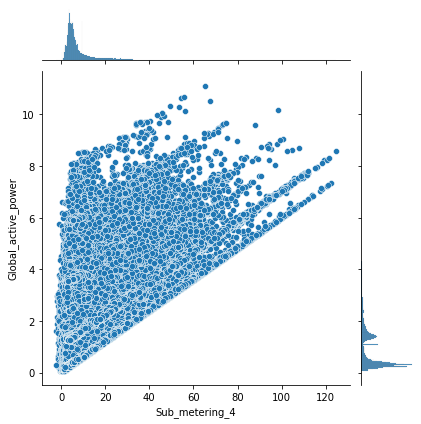

In [27]:
sns.jointplot(x = 'Sub_metering_4', y = 'Global_active_power', data = dataset, kind = 'scatter')

## Multivariate Analysis - HeatMap

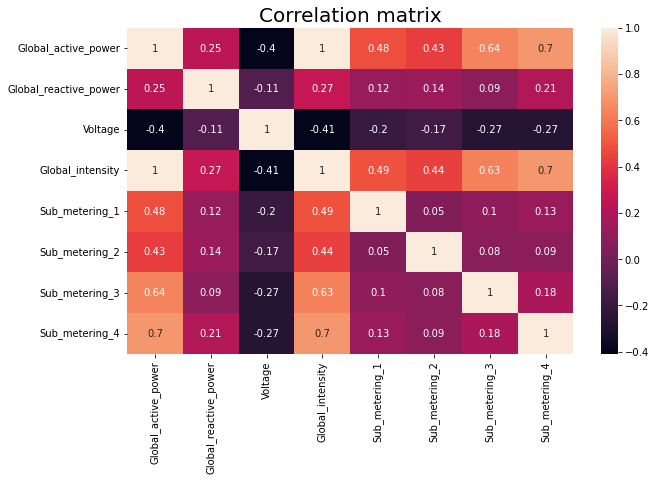

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr().round(2),annot=True)
plt.title('Correlation matrix',fontsize = 20)
plt.show()

## Dividing the dataset

In [29]:
X = dataset.iloc[:,[1,3,4,5,6]]
y = dataset.iloc[:,0]

In [30]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [31]:
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

## Splitting Train and Test Data

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1452681, 5)
(622578, 5)
(1452681,)
(622578,)


In [34]:
y_train

datetime
2007-12-19 08:42:00    2.098000
2009-01-29 09:55:00    2.284000
2010-08-20 23:54:00    1.091615
2008-08-17 05:58:00    0.082000
2010-05-26 16:07:00    0.400000
                         ...   
2008-10-15 17:59:00    2.950000
2007-03-08 15:16:00    0.472000
2009-10-12 13:29:00    0.218000
2007-07-17 00:35:00    0.302000
2010-10-29 11:12:00    0.410000
Name: Global_active_power, Length: 1452681, dtype: float64

## Model Building

### Linear Regression

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [36]:
predictions

array([3.16569966, 2.17775143, 0.6539764 , ..., 2.26772497, 1.45099767,
       1.40220346])

In [37]:
y12=lm.predict([[0.418,18.4,0.0,1.0,17.0]])
y12

C:\Users\Flay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.32297138])

### XGBRegressor

In [38]:
model2 = XGBRegressor()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [39]:
y_pred2

array([3.1277747 , 2.1857708 , 0.66408134, ..., 2.3147745 , 1.4682189 ,
       1.4095049 ], dtype=float32)

### Random Forest Regressor

In [40]:
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [41]:
y_pred1

array([3.09402795, 2.21365279, 0.66215774, ..., 2.31412029, 1.46254162,
       1.40692627])

### Ridge Regression

In [42]:
model3 = Ridge()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [43]:
y_pred3

array([3.16569747, 2.17775243, 0.65397593, ..., 2.26772332, 1.45099742,
       1.40220317])

## Comparing the models

In [44]:
from sklearn import metrics

### LinearRegression Evaluation

In [45]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSqaureValue:',metrics.r2_score(y_test,predictions))

MAE: 0.027129944863058867
MSE: 0.001796518733531681
RMSE: 0.04238535989621512
RSqaureValue: 0.9983747260480711


### XGBRegressor Evaluation


In [46]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:',metrics.mean_squared_error(y_test,y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print('RSqaureValue:',metrics.r2_score(y_test,y_pred2))

MAE: 0.020636411071013744
MSE: 0.0011184289729398312
RMSE: 0.03344292111852419
RSqaureValue: 0.9989881800602055


### RandomForestRegression Evaluation


In [47]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:',metrics.mean_squared_error(y_test,y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('RSqaureValue:',metrics.r2_score(y_test,y_pred1))

MAE: 0.021151646758946853
MSE: 0.001240766385784962
RMSE: 0.03522451398933649
RSqaureValue: 0.9988775038914952


### RidgeRegression Evaluation


In [48]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:',metrics.mean_squared_error(y_test,y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))
print('RSqaureValue:',metrics.r2_score(y_test,y_pred3))

MAE: 0.027129965768208544
MSE: 0.0017965190023453157
RMSE: 0.04238536306728203
RSqaureValue: 0.9983747258048808


In [49]:
#All the models are working well for this dataset
#Let us consider Linear Regression for deployment

## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lm,X,y,cv=5)

In [51]:
np.mean(cv)

0.9982971156884103

## Saving the model

In [52]:
import pickle
filename = 'PCASSS_model.pkl'
pickle.dump(lm,open(filename,'wb'))